In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
df = pd.read_csv('car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [15]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
x.shape

(301, 7)

In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
y.shape

(301,)

In [19]:
x['Current_yrs'] = 2021

In [20]:
x['No_yrs'] = x['Current_yrs'] - x['Year']

In [22]:
x.drop(['Year','Current_yrs'],axis=1,inplace=True)

In [23]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_yrs
0,5.59,27000,Petrol,Dealer,Manual,0,7
1,9.54,43000,Diesel,Dealer,Manual,0,8
2,9.85,6900,Petrol,Dealer,Manual,0,4
3,4.15,5200,Petrol,Dealer,Manual,0,10
4,6.87,42450,Diesel,Dealer,Manual,0,7


In [24]:
x = pd.get_dummies(x,drop_first=True)

In [25]:
x.head()

,Present_Price,Kms_Driven,Owner,No_yrs,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=0)

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [33]:
xgr = xgboost.XGBRegressor()

In [34]:
xgr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred = xgr.predict(x_test)

In [36]:
y_pred

array([ 7.1237073 ,  0.40415034,  4.3728037 ,  8.330413  , 13.763007  ,
        4.6923666 ,  3.0416398 ,  0.47805265,  4.2979684 ,  4.274347  ,
        3.2725825 ,  0.7855659 ,  4.746279  , 10.082733  ,  7.7508    ,
       12.7103    ,  6.938628  ,  4.145267  ,  0.46765745,  1.6635752 ,
        3.098372  ,  4.8037114 ,  4.4835563 , 10.707427  ,  0.20372915,
        0.7506069 ,  0.4858802 ,  0.5669563 ,  0.468253  ,  4.147382  ,
        2.2368858 ,  7.1836514 ,  0.56801707,  7.846908  ,  3.8871326 ,
        1.0931048 ,  5.535601  ,  4.5627437 ,  0.20300315,  8.134729  ,
       10.126108  , 15.354393  ,  4.287031  ,  4.1411896 ,  6.364474  ,
        9.98131   ,  0.25609794,  0.7783675 ,  5.0457234 ,  6.6383476 ,
        9.365536  ,  2.8767989 ,  5.0806475 , 15.349517  ,  1.1354941 ,
        1.0350732 ,  0.7299521 ,  2.3739076 ,  3.4163203 ,  2.481695  ,
        3.9729197 ,  6.250047  ,  2.4459503 , 17.37843   ,  4.3716426 ,
        4.938343  ,  8.027494  ,  6.126501  ,  0.44642717,  3.22

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

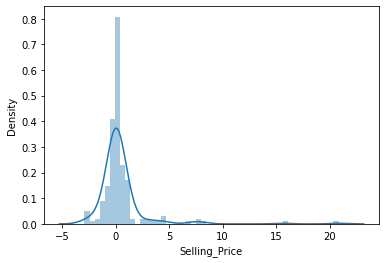

In [37]:
sns.distplot(y_test-y_pred)

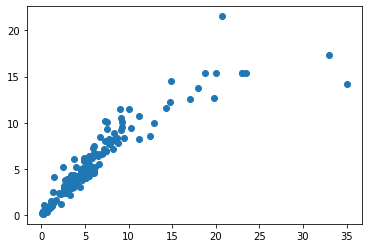

In [41]:
plt.scatter(y_test,y_pred)

In [44]:
regressor=xgboost.XGBRegressor()

In [45]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    
    }

In [46]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 2,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [48]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [49]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
y2_pred = regressor.predict(x_test)
y2_pred

array([ 7.268678  ,  0.48835   ,  4.279271  ,  8.239741  , 16.014498  ,
        4.9433155 ,  2.7672846 ,  0.5811227 ,  3.7299745 ,  5.148867  ,
        2.9644148 ,  0.79826486,  4.582999  ,  8.976973  ,  7.876877  ,
       15.195986  ,  7.4523745 ,  3.889705  ,  0.54868764,  1.6353754 ,
        2.9070244 ,  4.967257  ,  5.6418715 , 10.396148  ,  0.11949095,
        0.7425198 ,  0.3968037 ,  0.55701107,  0.5128002 ,  4.7704973 ,
        2.4000251 ,  6.7763844 ,  0.55701107,  8.521115  ,  3.8976555 ,
        1.2014196 ,  5.4899535 ,  4.9516325 ,  0.20978788,  8.275492  ,
        9.482693  , 16.642197  ,  4.598048  ,  4.1675463 ,  6.267429  ,
       10.212786  ,  0.33888805,  0.7597613 ,  4.939552  ,  6.811048  ,
        9.0475    ,  3.1615765 ,  5.027627  , 16.048729  ,  1.1582128 ,
        0.9994065 ,  0.53964543,  2.1255596 ,  3.4492607 ,  2.5997732 ,
        4.2007537 ,  6.1797256 ,  2.405378  , 19.564575  ,  4.0933895 ,
        5.3800473 ,  8.682694  ,  5.3813715 ,  0.5286021 ,  2.77

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

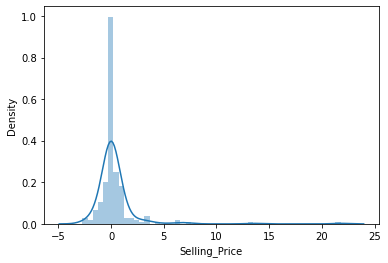

In [95]:
sns.distplot(y_test-y2_pred)

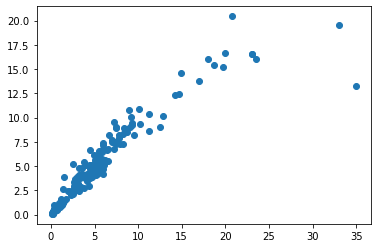

In [96]:
plt.scatter(y_test,y2_pred)

In [65]:
from sklearn.metrics import accuracy_score,r2_score

In [97]:
print('1.accuracy_score -->',r2_score(y_test,y_pred))
print('2.accuracy_score -->',r2_score(y_test,y2_pred))

1.accuracy_score --> 0.8154564003499193
2.accuracy_score --> 0.841386582640449


In [98]:
final_pred = regressor.predict(x)
final_pred

array([ 4.0840473 ,  5.0847955 ,  9.541237  ,  2.4967449 ,  4.3065634 ,
        9.482693  ,  6.7608323 ,  6.811048  ,  8.521115  ,  7.4108768 ,
        3.0386317 ,  7.0494375 ,  8.976973  ,  5.068963  ,  2.067314  ,
        7.876877  ,  7.453692  ,  7.876877  ,  4.110039  ,  2.528668  ,
        2.6625102 ,  4.967257  ,  2.9070244 ,  2.4107828 ,  2.6112838 ,
        3.0015237 ,  3.4492607 ,  4.700261  ,  1.8210906 ,  7.3125324 ,
        3.0367308 ,  2.6162887 ,  4.8340554 ,  6.7763844 ,  6.267429  ,
        2.9986203 ,  4.26229   ,  0.9708168 ,  2.8148441 ,  2.2041392 ,
        5.696528  ,  2.4047103 ,  2.0811174 ,  6.2380204 ,  1.1849566 ,
        9.0475    ,  3.3626993 ,  1.2381366 ,  5.068963  ,  8.25503   ,
       14.548285  , 16.5664    , 16.014498  , 15.955065  ,  3.6743426 ,
        4.7704973 ,  4.2487636 ,  4.9930654 ,  3.9148183 , 16.642197  ,
        7.4529305 ,  4.6648293 , 15.468789  , 16.048729  , 19.564575  ,
        4.481692  , 15.195986  ,  9.2126875 ,  4.38422   , 12.33

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

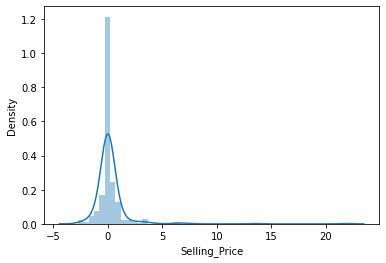

In [99]:
sns.distplot(y-final_pred)

In [100]:
print('1.accuracy_score -->',r2_score(y,final_pred))
print('2.accuracy_score -->',r2_score(y,final_pred))

1.accuracy_score --> 0.8736416383461081
2.accuracy_score --> 0.8736416383461081


In [102]:
x_train.drop(['Owner'],axis=1,inplace=True)
x_test.drop(['Owner'],axis=1,inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [103]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y2_pred = regressor.predict(x_test)
y2_pred

array([ 7.268678  ,  0.48835   ,  4.279271  ,  8.239741  , 16.014498  ,
        4.9433155 ,  2.7672846 ,  0.5811227 ,  3.7299745 ,  5.148867  ,
        2.9644148 ,  0.79826486,  4.582999  ,  8.976973  ,  7.876877  ,
       15.195986  ,  7.4523745 ,  3.889705  ,  0.54868764,  1.6353754 ,
        2.9070244 ,  4.967257  ,  5.6418715 , 10.396148  ,  0.11949095,
        0.7425198 ,  0.3968037 ,  0.55701107,  0.5128002 ,  4.7704973 ,
        2.4000251 ,  6.7763844 ,  0.55701107,  8.521115  ,  3.8976555 ,
        1.2014196 ,  5.4899535 ,  4.9516325 ,  0.20978788,  8.275492  ,
        9.482693  , 16.642197  ,  4.598048  ,  4.1675463 ,  6.267429  ,
       10.212786  ,  0.33888805,  0.7597613 ,  4.939552  ,  6.811048  ,
        9.0475    ,  3.1615765 ,  5.027627  , 16.048729  ,  1.1582128 ,
        0.9994065 ,  0.53964543,  2.1255596 ,  3.4492607 ,  2.5997732 ,
        4.2007537 ,  6.1797256 ,  2.405378  , 19.564575  ,  4.0933895 ,
        5.3800473 ,  8.682694  ,  5.3813715 ,  0.5286021 ,  2.77

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

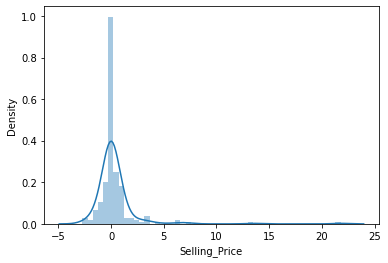

In [107]:
sns.distplot(y_test-y2_pred)

In [109]:
print('1.accuracy_score -->',r2_score(y_test,y_pred))
print('2.accuracy_score -->',r2_score(y_test,y2_pred))

1.accuracy_score --> 0.8154564003499193
2.accuracy_score --> 0.8413871438157027


In [110]:
import pickle
# open a file, where you ant to store the data
file = open('XGBoost_regressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)